In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [8]:
df = pd.read_csv('data/tmdb_popular.csv')

df['first_air_date'] = pd.to_datetime(df['first_air_date'], errors='coerce')
df['year'] = df['first_air_date'].dt.year
grp = df.groupby('year').agg(
    mean_popularity=('popularity','mean'),
    count_shows=('id','count')
).dropna().sort_index()

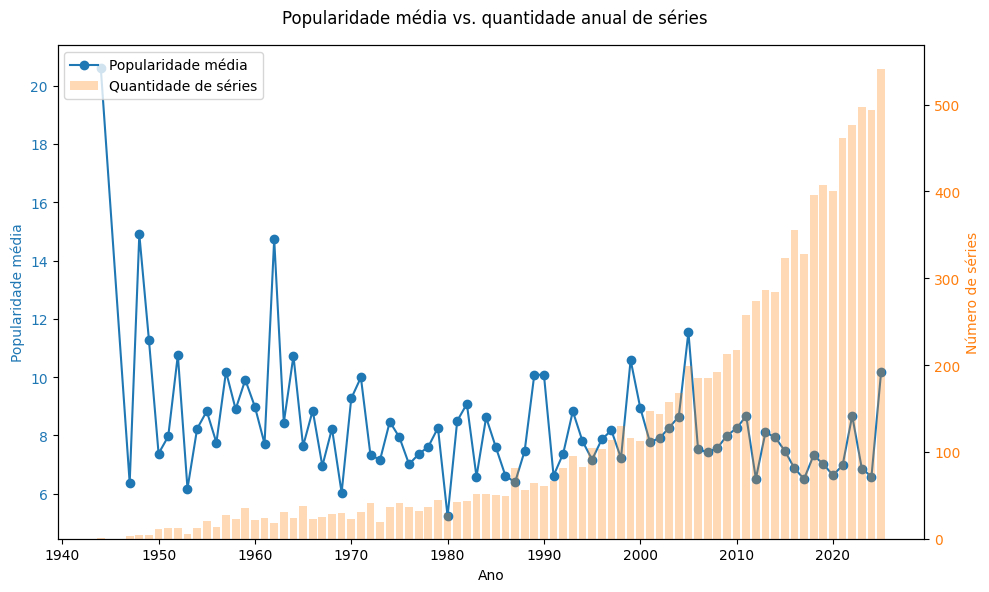

O gráfico utiliza dois eixos Y para representar simultaneamente a popularidade média e o número médio de votos das séries de TV ao longo do tempo.  

Enquanto o eixo esquerdo mostra o índice de popularidade, o eixo direito apresenta o volume de votos do público.  

In [9]:
fig, ax1 = plt.subplots(figsize=(10,6))

color1 = 'tab:blue'
ax1.set_xlabel('Ano')
ax1.set_ylabel('Popularidade média', color=color1)
ax1.plot(grp.index, grp['mean_popularity'], color=color1, marker='o', label='Popularidade média')
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel('Número de séries', color=color2)
ax2.bar(grp.index, grp['count_shows'], color=color2, alpha=0.3, label='Quantidade de séries')
ax2.tick_params(axis='y', labelcolor=color2)

fig.suptitle('Popularidade média vs. quantidade anual de séries')
fig.tight_layout()

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines+lines2, labels+labels2, loc='upper left')

plt.show()
display(Markdown("O gráfico utiliza dois eixos Y para representar simultaneamente a popularidade média e o número médio de votos das séries de TV ao longo do tempo.  "))
display(Markdown("Enquanto o eixo esquerdo mostra o índice de popularidade, o eixo direito apresenta o volume de votos do público.  "))
